# Деревья решени


**Дерево решений (Decision Tree)** - это структура данных, используемая в машинном обучении для принятия решений. Она представляет собой древовидную структуру, в которой каждый узел представляет собой тест на признаке, каждая ветвь представляет результат этого теста, и каждый лист дерева представляет конечное решение или класс. Дерево строится на основе обучающего набора данных, где каждый экземпляр содержит значения признаков и соответствующий класс или результат.

### Идея и смысл:

- Разделяющие правила: Дерево решений разбивает данные на подгруппы, используя разделяющие правила для каждого узла. Например, "Если признак X меньше 5, перейдите к левой ветви, иначе к правой".

- Рекурсивное разбиение: Процесс построения дерева решений рекурсивно разбивает данные на все более узкие категории до тех пор, пока не будет достигнуто какое-то условие останова, такое как достижение определенной глубины дерева или минимального числа экземпляров в листе.

- Принятие решения: Когда новый экземпляр данных проходит через дерево, он проходит последовательность тестов, начиная с корня и двигаясь к листьям. Решение, связанное с листом, становится предсказанием для данного экземпляра.

---------------
*Математический аппарат:*

- Функция разделения (Splitting Function): Определяет, как разделить данные на каждом узле дерева. Это может быть, например, условие типа "значение признака X < 5".

- Критерии информативности: Оценивают, насколько хорошо произведено разделение. Некоторые распространенные критерии включают в себя энтропию, индекс Джини и критерий ошибок классификации.

- Функция оценки: Оценивает качество дерева и определяет, когда остановить рекурсивное разбиение.

-------------------------------------------------------------------------------------------------------------------
Суть дерева решений заключается в том, чтобы представить данные в виде иерархической структуры решений, что делает его легко интерпретируемым и понятным. Деревья решений могут использоваться для задач классификации и регрессии. Они часто используются в практике из-за их простоты и способности автоматически выявлять важные признаки в данных.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# импорт данных об опухолях 

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# создаем обучающую и тестовую выборку

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(tree1.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree1.score(X_test, y_test)))


Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.930


--------------
Дерево оказалось слишком сложным и в результате алгоритм **ПЕРЕОБУЧИЛСЯ** - это основная проблема решающих деревьев.

------

В библиотеке scikit-learn параметры для контроля переобучения в деревьях решений могут быть настроены при создании объекта модели DecisionTreeClassifier или DecisionTreeRegressor. Вот несколько ключевых параметров и их краткие характеристики:

- **max_depth** (максимальная глубина):
 Ограничивает глубину дерева.
- **min_samples_split** (минимальное количество образцов для разделения узла):
 Минимальное количество образцов, необходимых для разделения внутреннего узла.
- **min_samples_leaf** (минимальное количество образцов в листе): Минимальное количество образцов, необходимых в листе.
- **max_features** (максимальное количество признаков для разделения):
Ограничивает количество признаков, участвующих в разделении.
- **criterion** (критерий разделения):
 Определяет функцию для измерения качества разделения.

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(tree1.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree1.score(X_test, y_test)))

Правильность на обучающем наборе: 0.995
Правильность на тестовом наборе: 0.937


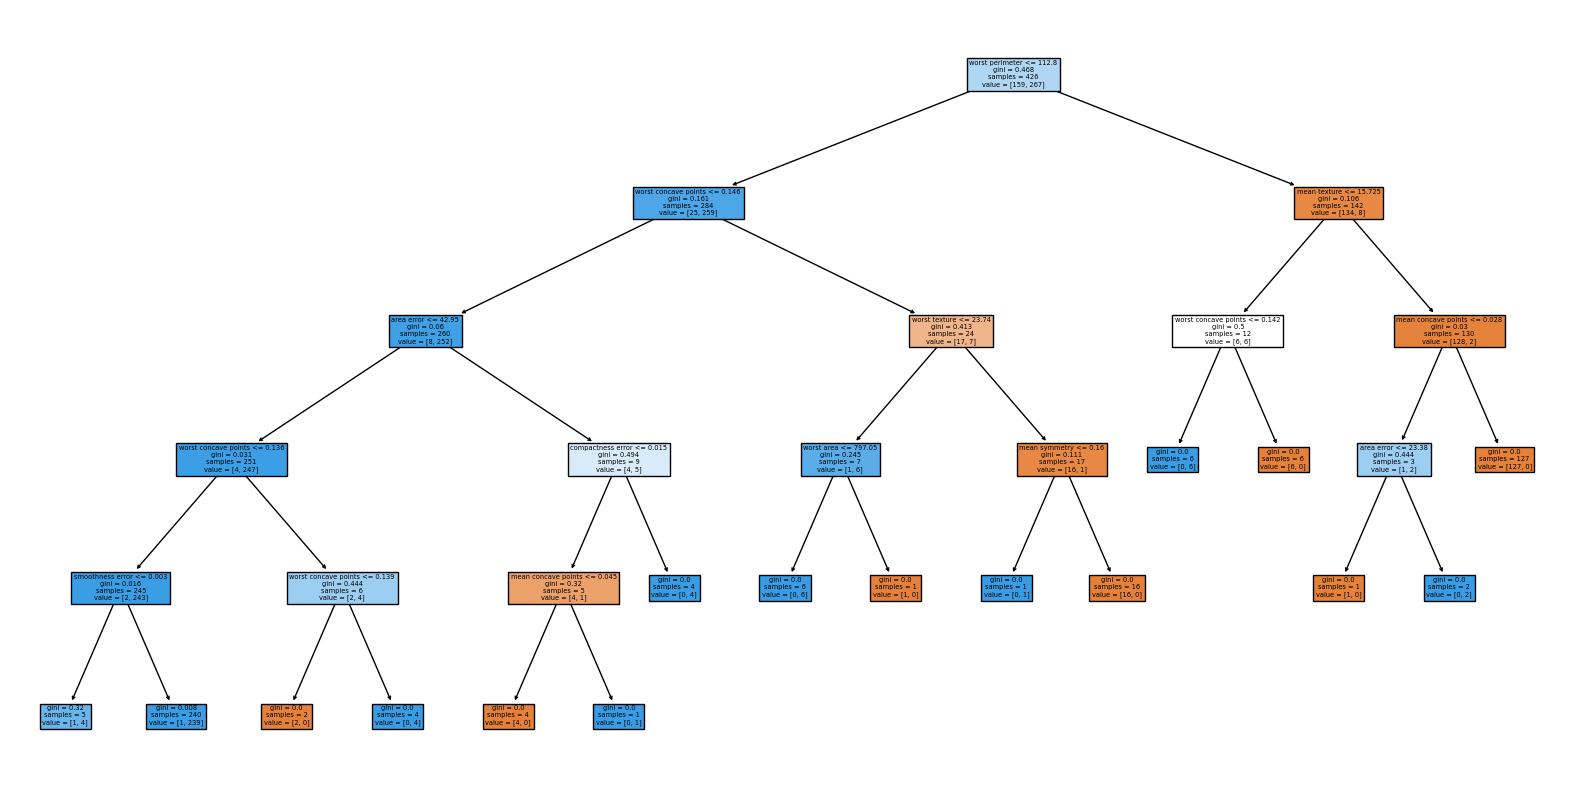

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Отрисовка дерева с помощью matplotlib

plt.figure(figsize=(20,10))
plot_tree(tree1, filled=True, feature_names=cancer.feature_names)
plt.show()

In [6]:
for feature, score in zip(cancer.feature_names, tree1.feature_importances_):
    print(feature, score)

mean radius 0.0
mean texture 0.026365101502476243
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.021485627634643036
mean symmetry 0.009617669758979376
mean fractal dimension 0.0
radius error 0.0
texture error 0.0
perimeter error 0.0
area error 0.023115231031438904
smoothness error 0.0019194959208066137
compactness error 0.014533367635791057
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.0
worst texture 0.03229146933585894
worst perimeter 0.7082258133190685
worst area 0.00875894924478479
worst smoothness 0.0
worst compactness 0.0
worst concavity 0.0
worst concave points 0.15368727461615247
worst symmetry 0.0
worst fractal dimension 0.0


DecisionTreeRegressor (и все остальные регрессионные модели на основе дерева) не умеет 
экстраполировать или делать прогнозы вне диапазона значений обучающих данных.

In [7]:
from sklearn.tree import DecisionTreeRegressor

# импортируем данные о ценах в бостоне 
from sklearn.datasets import load_boston
boston = load_boston()


# создаем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=42)

C:\Users\dermi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [8]:
tree_reg = DecisionTreeRegressor(max_depth=4, min_samples_leaf=22, max_leaf_nodes=50).fit(X_train,y_train)

print("Правильность на обучающем наборе: {:.3f}".format(tree_reg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree_reg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.798
Правильность на тестовом наборе: 0.671


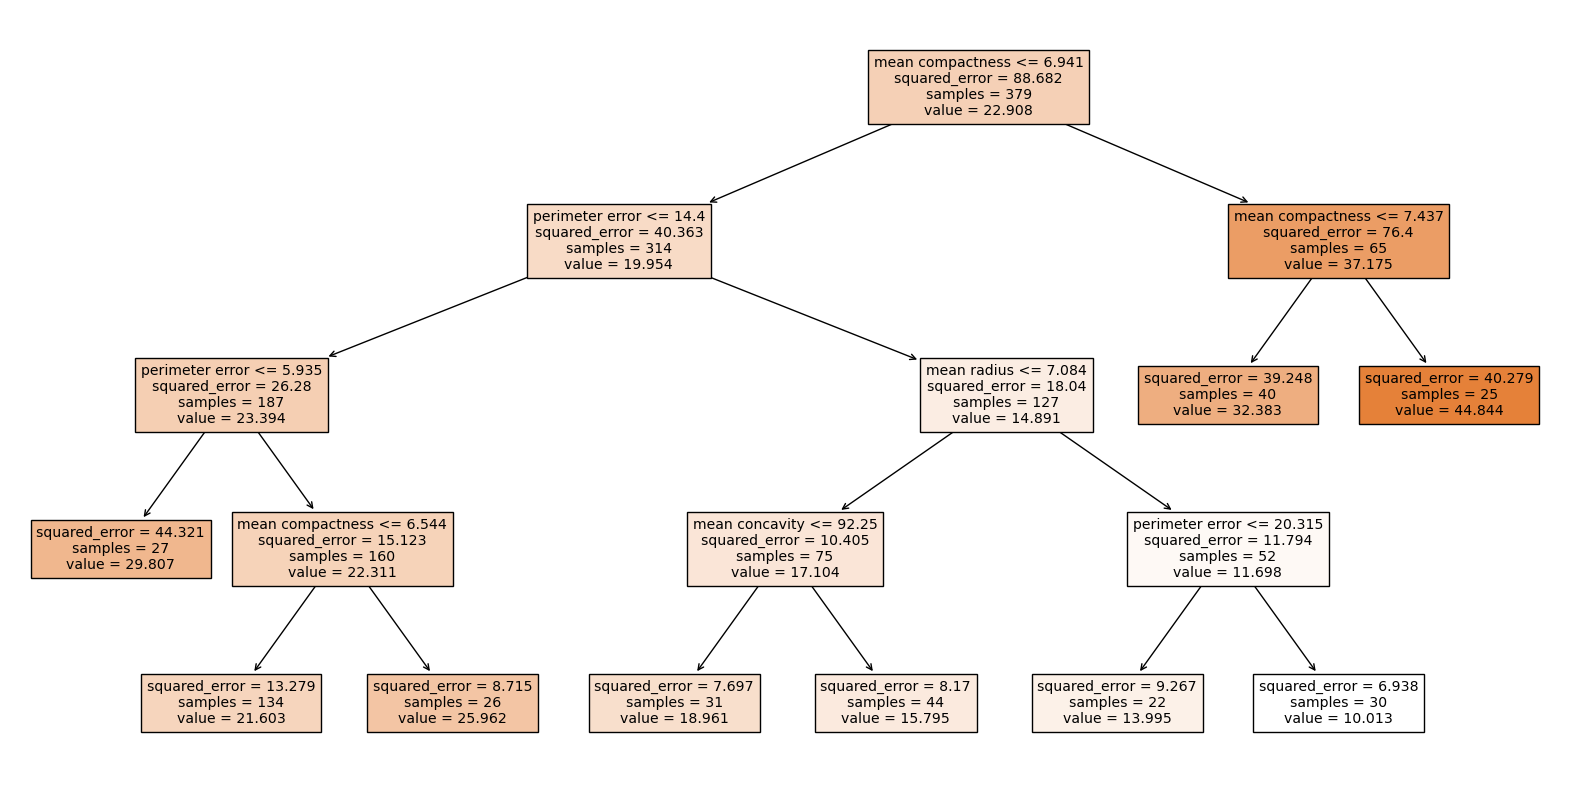

In [9]:
plt.figure(figsize=(20,10))
plot_tree(tree_reg, filled=True, feature_names=cancer.feature_names)
plt.show()

In [10]:
tree_reg.predict(X_test)

array([21.60298507, 29.80740741, 15.79545455, 29.80740741, 18.96129032,
       21.60298507, 18.96129032, 15.79545455, 21.60298507, 21.60298507,
       15.79545455, 18.96129032, 10.01333333, 21.60298507, 21.60298507,
       32.3825    , 15.79545455, 10.01333333, 44.844     , 13.99545455,
       21.60298507, 21.60298507, 15.79545455, 25.96153846, 15.79545455,
       13.99545455, 21.60298507, 13.99545455, 18.96129032, 21.60298507,
       18.96129032, 21.60298507, 32.3825    , 21.60298507, 15.79545455,
       15.79545455, 32.3825    , 21.60298507, 18.96129032, 21.60298507,
       18.96129032, 25.96153846, 44.844     , 21.60298507, 21.60298507,
       15.79545455, 15.79545455, 21.60298507, 18.96129032, 29.80740741,
       21.60298507, 32.3825    , 18.96129032, 25.96153846, 44.844     ,
       21.60298507, 15.79545455, 29.80740741, 21.60298507, 18.96129032,
       25.96153846, 32.3825    , 29.80740741, 21.60298507, 29.80740741,
       15.79545455, 13.99545455, 21.60298507, 29.80740741, 18.96

In [11]:
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1])

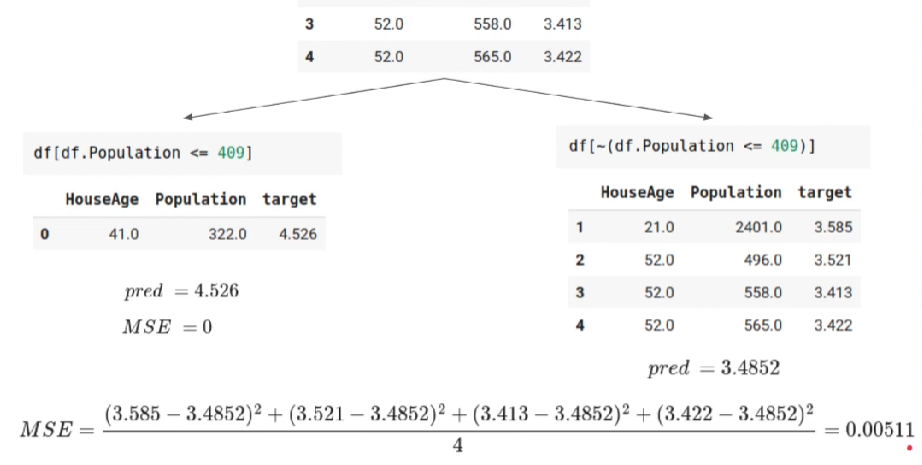

## Ансамбли деревьев решений

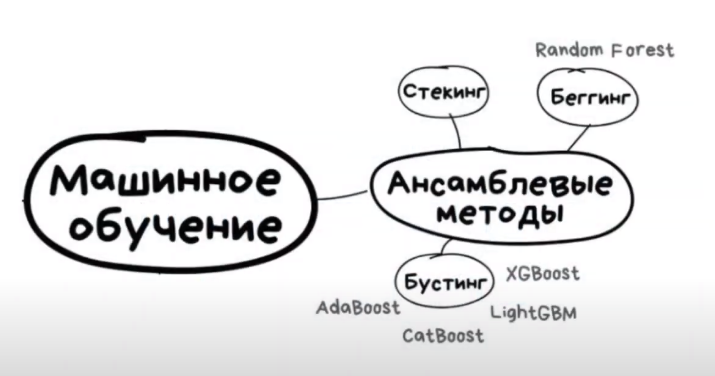

## Случайный лес

**Случайный лес** (Random Forest) - это ансамблевый метод машинного обучения, который строит несколько деревьев решений и объединяет их для получения более стабильных и точных прогнозов. Основная идея заключается в том, чтобы обучить множество деревьев на различных подмножествах данных и/или признаков, а затем усреднить (для задач регрессии) или провести голосование (для задач классификации) результатов этих деревьев.

#### Основные принципы случайного леса:

- **Бутстраппинг** (Bagging): Каждое дерево обучается на случайной подвыборке с возвращением из обучающего набора данных (бутстрап-выборка). Это позволяет использовать каждое наблюдение для обучения нескольких деревьев, при этом некоторые наблюдения могут появиться в одной бутстрап-выборке несколько раз, а другие вовсе отсутствовать.

- **Случайные подпространства** (Random Subspaces): Для каждого разбиения в дереве решений случайным образом выбираются подмножества признаков. Это позволяет уменьшить корреляцию между деревьями и повысить их разнообразие.

- **Усреднение или голосование**: Для задачи регрессии результаты деревьев усредняются, а для задачи классификации используется голосование большинства для принятия решения.

-----------------
Основные параметры случайного леса:

- **n_estimators**: Количество деревьев в ансамбле. Большее количество деревьев может повысить точность, но также увеличит вычислительную сложность и время обучения.
---
- **max_features**: Максимальное количество признаков, которые рассматриваются при каждом разделении. Это помогает уменьшить корреляцию между деревьями и повысить их разнообразие.
---
- *max_depth*: Максимальная глубина каждого дерева. Этот параметр помогает контролировать переобучение. Обычно лучше установить значение None (неограничено) и использовать другие методы контроля глубины, такие как min_samples_split и min_samples_leaf.
- *min_samples_split*: Минимальное количество образцов, необходимых для разделения внутреннего узла дерева.
- *min_samples_leaf*: Минимальное количество образцов в листе дерева. Увеличение этого значения может привести к более устойчивому дереву, снижая вероятность переобучения.



In [12]:
# импорт данных об опухолях 

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# создаем обучающую и тестовую выборку

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(random_forest_clf.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(random_forest_clf.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.958


In [14]:
from sklearn.ensemble import RandomForestRegressor

# импортируем данные о ценах в бостоне 
from sklearn.datasets import load_boston
boston = load_boston()


# создаем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42);

random_forest_reg = RandomForestRegressor(n_estimators=500, min_samples_leaf=5, min_samples_split=5).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(random_forest_reg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(random_forest_reg.score(X_test, y_test)))

C:\Users\dermi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

Правильность на обучающем наборе: 0.925
Правильность на тестовом наборе: 0.856


### В случае Random Forest, параметры, влияющие на переобучение и недообучение, включают:

**Количество деревьев (n_estimators)**:
- Переобучение: Большое количество деревьев может привести к переобучению, особенно если данные содержат шум или выбросы.
- Недообучение: Слишком маленькое количество деревьев может привести к недообучению, так как ансамбль не сможет достаточно хорошо обобщать.

**Максимальная глубина деревьев (max_depth)**:
- Переобучение: Глубокие деревья могут привести к переобучению, так как они слишком точно подстраиваются под обучающий набор данных.
- Недообучение: Слишком мелкие деревья могут привести к недообучению, так как они неспособны захватывать сложные взаимосвязи.

**Минимальное количество объектов в листьях (min_samples_leaf)**:
- Переобучение: Слишком маленькое значение может привести к переобучению, так как деревья будут стремиться к точному подстраиванию под обучающие данные.
- Недообучение: Слишком большое значение может привести к недообучению, так как деревья будут слишком грубыми и неспособными захватывать детали в данных.

**Максимальное количество признаков для разделения (max_features):**
- Переобучение: Слишком большое значение может привести к переобучению, так как модель будет слишком адаптирована к обучающему набору.
- Недообучение: Слишком маленькое значение может привести к недообучению, так как модель может терять важные признаки.

**Критерий разделения (criterion):**
- В RandomForest можно выбирать между "gini" (по умолчанию) и "entropy". Выбор может влиять на форму деревьев.

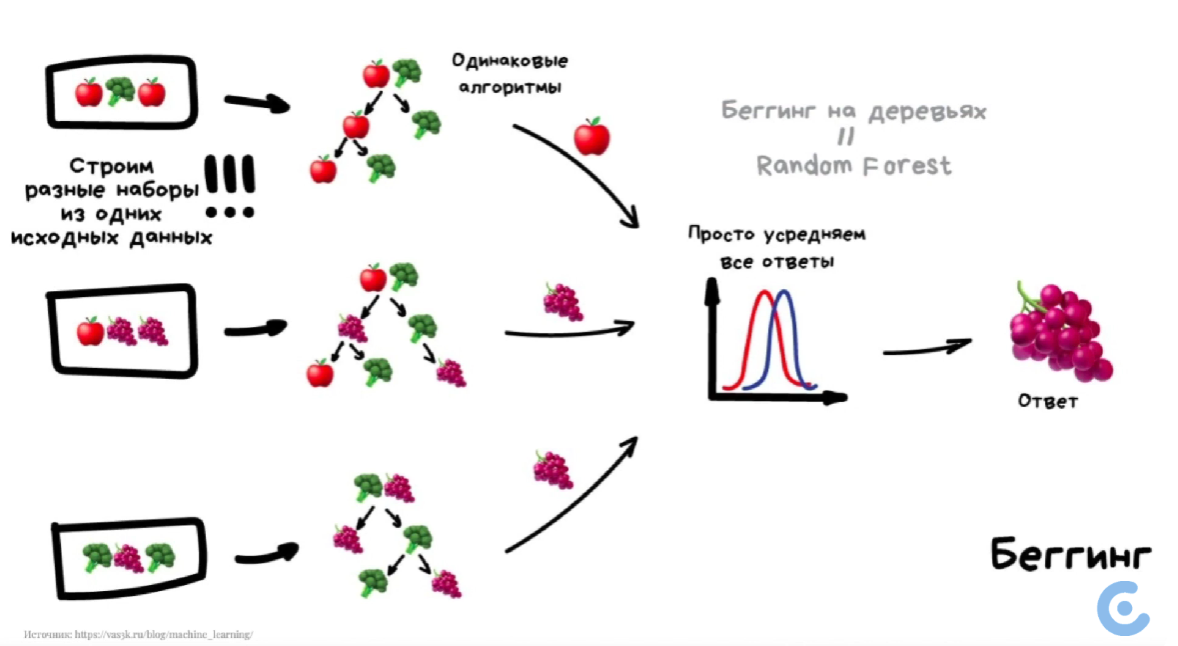

## Бустинг

**Бустинг на деревьях** - это ансамблевый метод машинного обучения, который строит последовательность слабых моделей (обычно деревьев решений) и комбинирует их взвешенной суммой для улучшения предсказательной способности модели.

### Как работает:
- Построение базовых моделей:
Начинается с построения слабой базовой модели (например, дерева решений) на обучающем наборе данных.
Эта модель может быть слабой, то есть иметь низкую предсказательную способность, но она должна быть лучше случайного угадывания.

- Взвешивание ошибок:
Рассчитывается остаточная ошибка (разница между предсказанными и фактическими значениями) для каждого обучающего примера.
Обучение следующей модели:

- Следующая модель строится с учетом остаточной ошибки предыдущей модели. Основная идея заключается в том, чтобы скорректировать ошибки предыдущих моделей, фокусируясь на тех примерах, где они были наиболее неточны.
- Агрегация моделей:
Построенные модели объединяются в ансамбль, используя взвешенную сумму их предсказаний.
- Итеративный процесс:
Процесс повторяется, пока не достигнут критерий останова (например, заданное количество моделей или достижение определенной    точности).

#### Преимущества:
- Высокая предсказательная способность: Бустинг стремится построить сильную модель путем уточнения слабых моделей.
- Устойчивость к переобучению: Применение взвешенной коррекции ошибок позволяет уменьшить риск переобучения.

#### Недостатки:
- Чувствительность к выбросам: Бустинг может быть чувствителен к выбросам в данных.
- Высокая вычислительная сложность: В процессе построения ансамбля каждая новая модель настраивается на остаточные ошибки предыдущих, что может быть вычислительно затратным.
------
Некоторые виды бустинга на деревьях:
- AdaBoost (Adaptive Boosting): Адаптивное взвешивание ошибок.
- Gradient Boosting: Метод, который минимизирует функцию потерь, используя градиентный спуск.
- XGBoost (Extreme Gradient Boosting): Эффективная и мощная реализация градиентного бустинга.
- LightGBM: Библиотека для градиентного бустинга с использованием гистограмм для улучшения производительности.
- CatBoost: Библиотека, оптимизированная для работы с категориальными признаками.

-------
Бустинг на деревьях представляет собой эффективный метод машинного обучения, который обеспечивает высокую точность предсказаний. Он особенно полезен в задачах классификации и регрессии, где необходимо достичь высокой обобщающей способности модели. Однако важно тщательно настраивать параметры и следить за вычислительной сложностью в зависимости от выбранной библиотеки.

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(n_estimators=1000, learning_rate=1, random_state=42)
gbrt.fit(X_train, y_train)
 
print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))
print('\nВАЖНО установить random_state чтобы зафиксировать определенный результат')

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.993

ВАЖНО установить random_state чтобы зафиксировать определенный результат


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

gb_reg = GradientBoostingRegressor(n_estimators=500, min_samples_leaf=3, min_samples_split=5, learning_rate=0.05)
gb_reg.fit(X_train, y_train)
 
print("Правильность на обучающем наборе: {:.3f}".format(gb_reg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gb_reg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.994
Правильность на тестовом наборе: 0.893


Важными параметрами для бустинга являются:

**Скорость обучения (learning_rate):**
- Переобучение: Большая скорость обучения может привести к переобучению, особенно в сочетании с большим количеством деревьев.
- Недообучение: Слишком маленькая скорость обучения может замедлить сходимость и требовать больше деревьев для достижения хороших результатов.

**Параметры регуляризации (например, subsample, lambda, alpha в случае XGBoost):**
- Регуляризационные параметры могут помочь управлять сложностью модели и предотвращать переобучение.

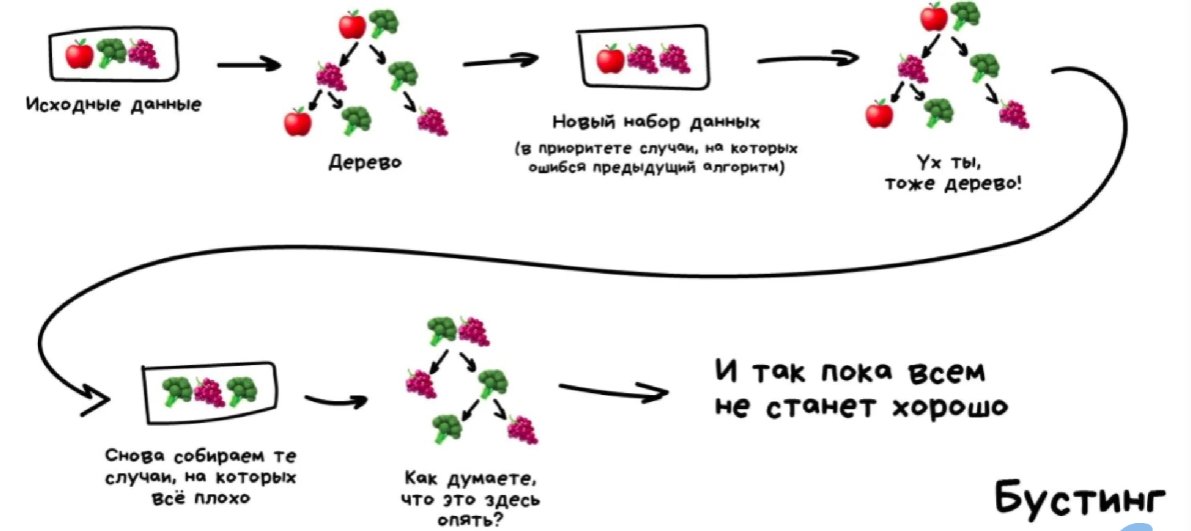

# КАК ИТОГ
## Одно дерево хорошо, а много - ещё лучше!

Выбор между бэггингом (например, Random Forest) и бустингом (например, Gradient Boosting) зависит от различных факторов. Random Forest обычно более устойчив к переобучению, используя множество деревьев и бутстрэп-выборку. Это также более простой в настройке и может быть эффективно параллелизовано. Однако на некоторых задачах бустинг, особенно XGBoost и LightGBM, может обеспечить высокую точность, захватывая сложные зависимости в данных. Бустинг, однако, более вычислительно сложен и может быть чувствителен к выбросам. В общем, выбор зависит от требований задачи: Random Forest подходит для устойчивости и простоты, в то время как бустинг может быть предпочтителен при стремлении к максимальной точности при готовности к затратам на обучение.